In [1]:
#import packages
import pandas as pd
from plotnine import *

## Task 1

**1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

- Income is mapped to the x-axis

- Life Expectancy is mapped to the y-axis

- Population is mapped to the size of the bubbles.

- The color of the bubbles is based on the four regions category

**2. Import the q1data.csv dataset.**

**3. Recreate the plot as best you can using plotnine.**

**4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

Another several numeric variable plot that could be used besides geom_point could be a boxplot with points overlaid (geom_boxplot, geom_jitter). The boxplot does a pretty good job of demonstrating the data. There is a boxplot for each of the four regions (region on x) with the life expectancy on the y-axis. The geom_jitter places the actual observed points over the boxplot, which are sized to the population like the previous visualization, but are now colored by income level (on a continuous gradient scale). This provides a quick view of the distribution of life expectancy for each region (mean, quartiles, outliers) along with some features of each region such as population size and income level (size of points, color of points, respectively).

In [2]:
#import the dataset
q1data = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/Data/q1data.csv")

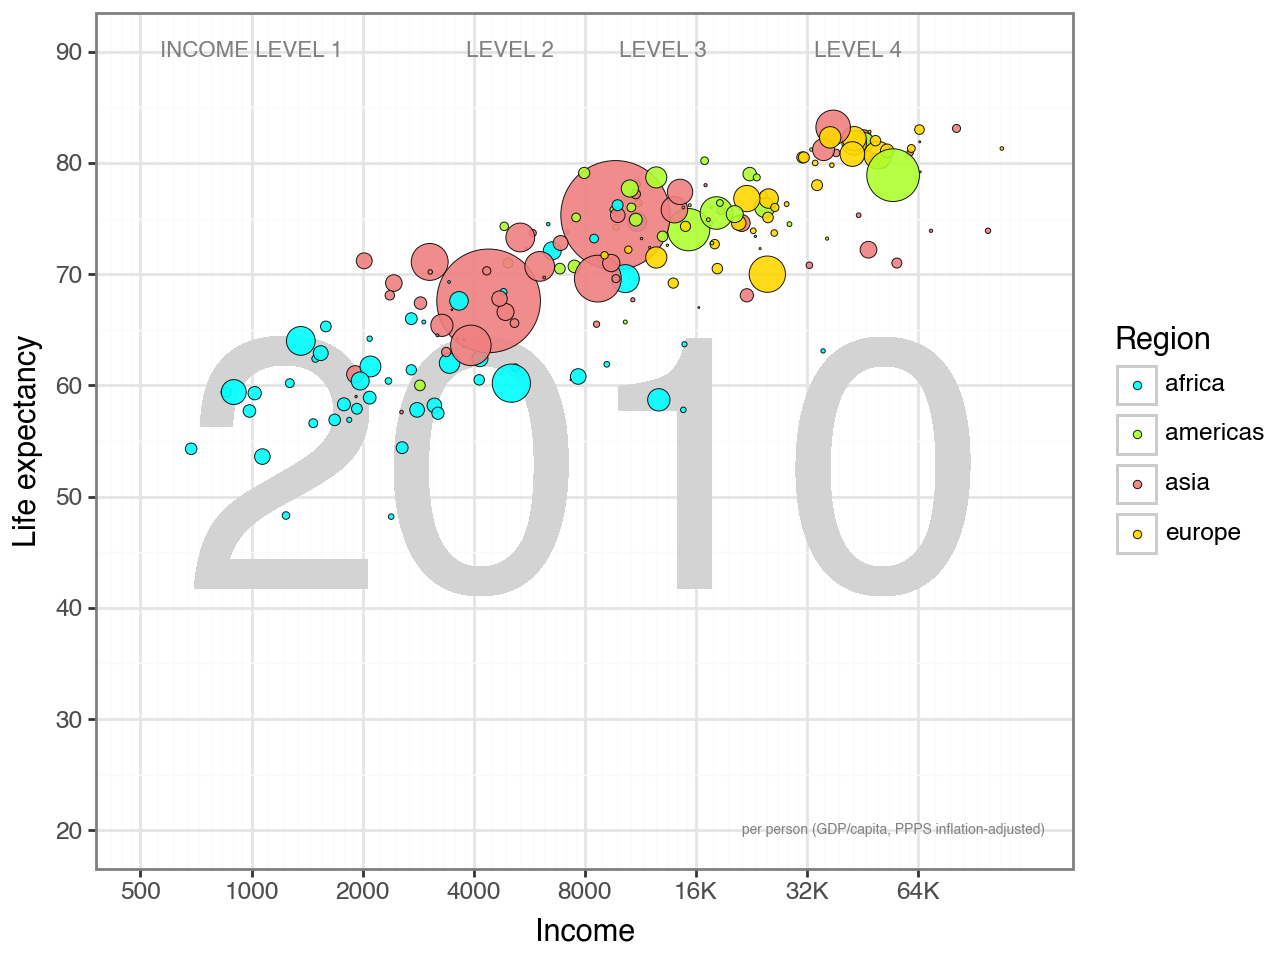

In [13]:
#recreate the plot
#filter the data for 2010 and drop NA values
q1data_2010 = q1data[q1data['year'] == 2010].dropna(subset=['income', 'life_exp', 'population', 'four_regions'])

#colors to match gapminder
colors = {
    'africa': 'cyan',
    'americas': 'greenyellow',
    'asia': 'lightcoral',
    'europe': 'gold'
}
#creating the bubble plot
(ggplot(q1data_2010, aes(x='income', y='life_exp', size='population', fill='four_regions'))
    + geom_text(aes(label='2010', x=8000, y=50), color='lightgrey', size=130, alpha=0.3)
    + annotate('text', x=1000, y=90, label='INCOME LEVEL 1', color='grey', size=8, ha='center')
    + annotate('text', x=5000, y=90, label='LEVEL 2', color='grey', size=8, ha='center')
    + annotate('text', x=13000, y=90, label='LEVEL 3', color='grey', size=8, ha='center')
    + annotate('text', x=44000, y=90, label='LEVEL 4', color='grey', size=8, ha='center') 
    + annotate('text', x=55000, y=20, label='per person (GDP/capita, PPPS inflation-adjusted)', color='grey', size=5, ha='center')
    + geom_point(alpha=0.9, color= 'black', stroke=0.2)
    + labs(x='Income', y='Life expectancy', fill='World Regions')
    + scale_size(range = [.1, 22])
    + scale_x_log10(
        limits=(500, 128000),
        breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels=[500, 1000, 2000, 4000, 8000, '16K', '32K', '64K']
    )
    + scale_y_continuous(
        limits=(20, 90),
        breaks=list(range(20, 91, 10))
    )
    + scale_fill_manual(
        name='Region', 
        values=colors
    )
    + guides(size=False)
    + theme_bw()
   
)

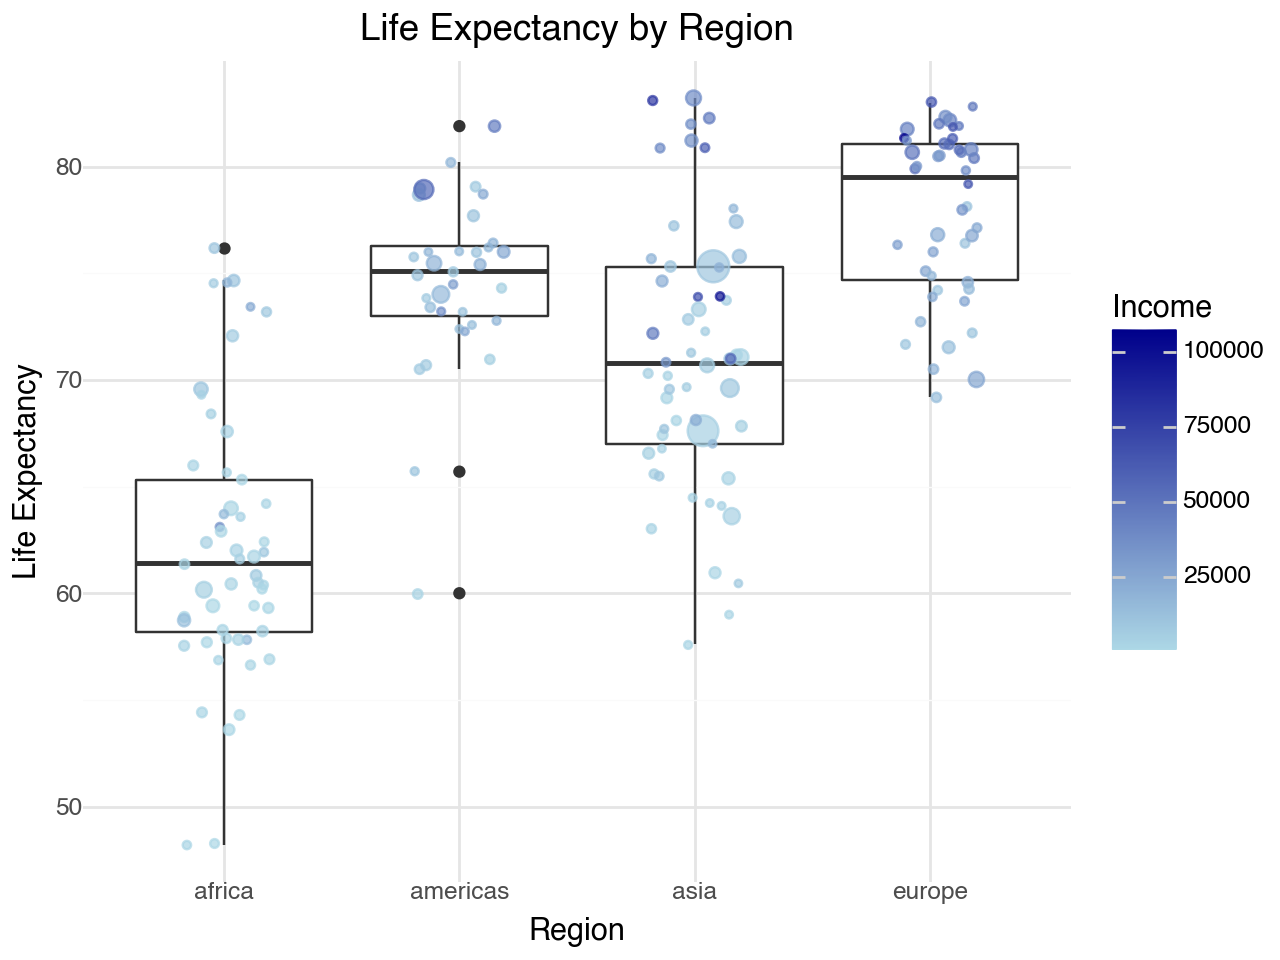

In [14]:
#boxplot code
(ggplot(q1data_2010.dropna(subset=['four_regions']), aes(x='four_regions', y='life_exp')) 
    + geom_boxplot()
    + geom_jitter(aes(size='population', color='income'), width=0.2, alpha=0.7)
    + labs(title='Life Expectancy by Region',
           x='Region',
           y='Life Expectancy',
           color='Income (Continuous)')
    + scale_color_gradient(
            name='Income', 
            low='lightblue', high='darkblue'
        )
    + theme_minimal()
    + guides(size=False)
)

## Task 2

**1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

- Exports are mapped to the x-axis

- Imports are mapped to the y-axis

- The size of the bubbles is mapped to energy use

- The color of the bubbles is based on the four regions category

**2. Import the q2data.csv dataset.**

**3. Recreate the plot as best you can using plotnine.**

**4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

Another geom that we could use here could be geom_jitter, which is like geom_point, and facet wrap by region. This geometry appears to do a pretty good job of visualizing the data. By facet wrapping by region, it allows the viewers to make distinctions that are more clear than if all points were on one plot. For example, it appears as though Asia and Europe have the greatest variability, and Africa appears to have the least amount of imports. With so many points overlaid in the original graph, it would be difficult to draw this conclusions as confidently as when they are in separate plots.

In [15]:
#import the dataset
q2data = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/Data/q2data.csv")

<positron-console-cell-16>:18: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-16>:18: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 90 rows containing missing values.


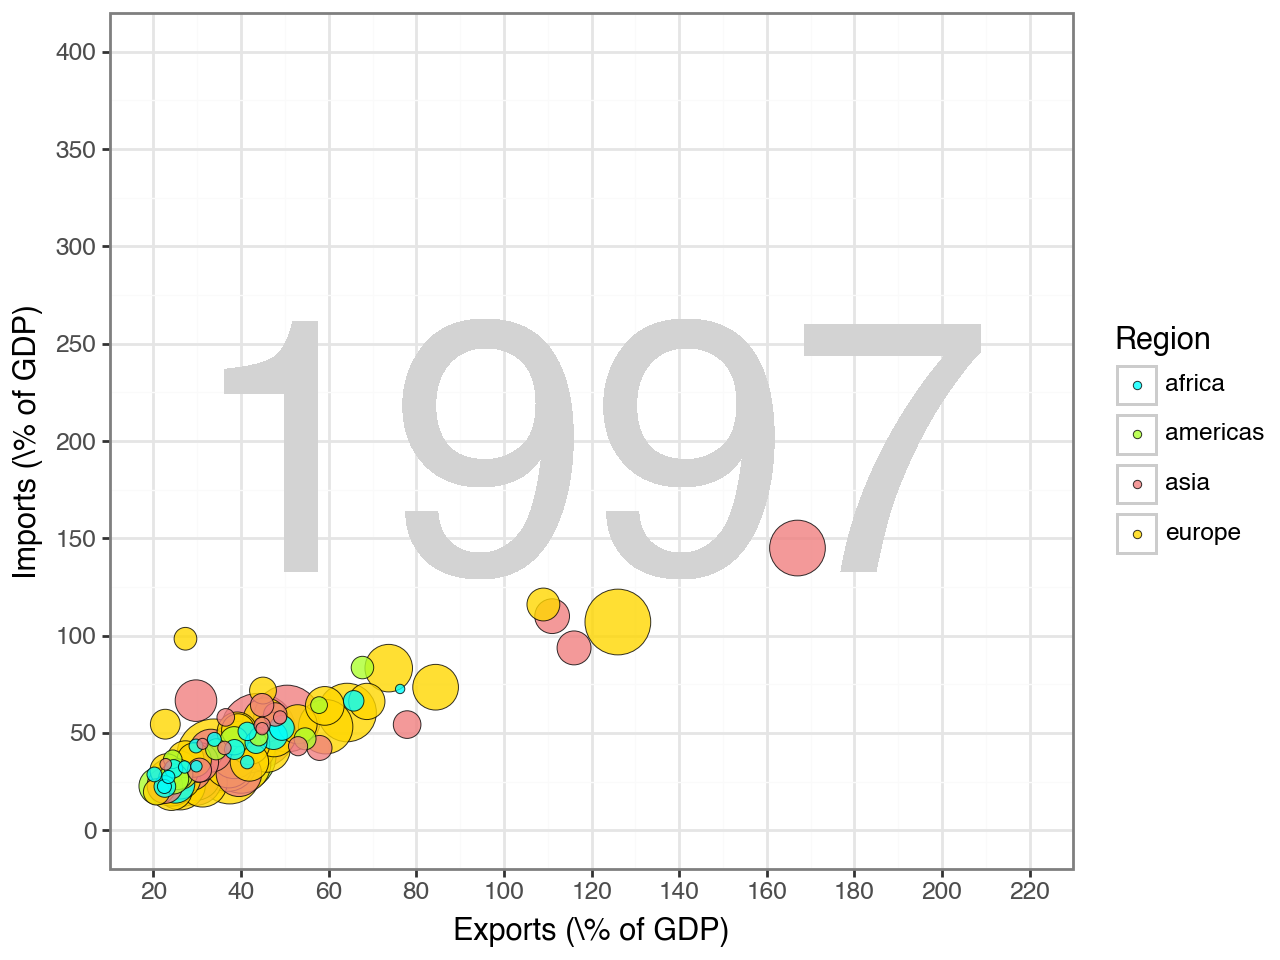

In [16]:
#recreate the graph
#cleaning the data
q2data_clean = q2data.dropna(subset=['four_regions'])
q2data_clean['energy'] = pd.to_numeric(q2data_clean['energy'], errors='coerce')
#make the smaller points on top
q2data_clean = q2data_clean.sort_values(by='energy', ascending=False)
#colors to match gapminder
colors = {
    'africa': 'aqua',
    'americas': 'greenyellow',
    'asia': 'lightcoral',
    'europe': 'gold'
}
#making the plot
(ggplot(q2data_clean, aes(x='exports', y='imports', size='energy', fill='four_regions')) 
    + geom_point(alpha=0.8, color="black", stroke=0.2)
    + geom_text(aes(label='1997'), x=120, y=180, color='lightgrey', size=130, alpha=0.3)
    + labs(x='Exports (\% of GDP)', y='Imports (\% of GDP)', fill='World Regions')
    + scale_size(range = [.1, 15])
    + scale_x_continuous(
        limits=(20, 220),
        breaks=list(range(20,221,20))
    )
    + scale_y_continuous(
        limits=(0, 400),
        breaks=list(range(0, 401, 50))
    )
    + scale_fill_manual(
        name='Region', 
        values=colors
    )
    + guides(size=False)
    + theme_bw()
   
)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 91 rows containing missing values.


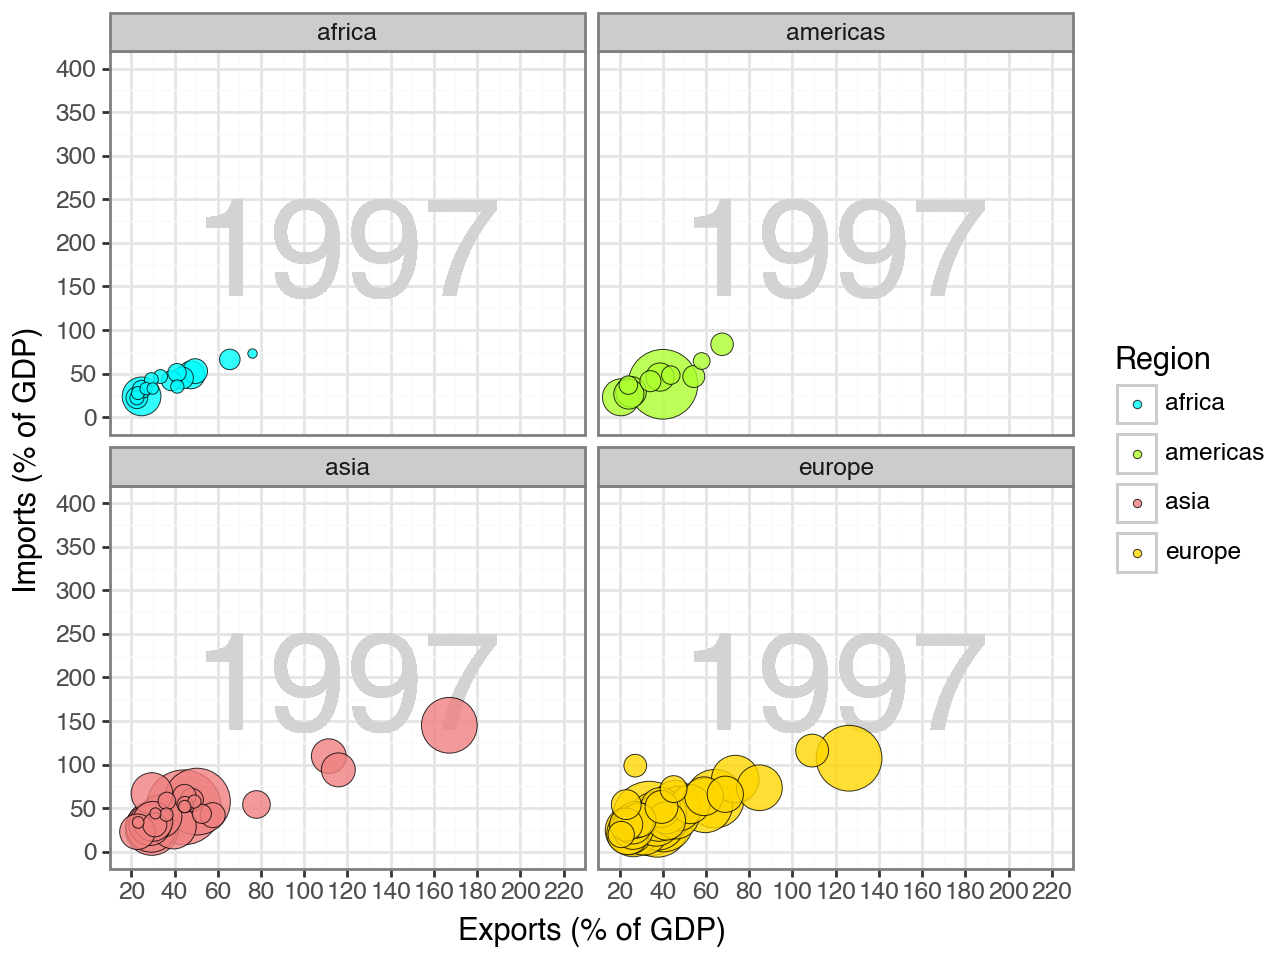

In [31]:
#alternative plot
(ggplot(q2data_clean, aes(x='exports', y='imports', size='energy', fill='four_regions'))
     + geom_text(aes(label='1997'), x=120, y=180, color='lightgrey', size=50, alpha=0.3)
     + geom_jitter(alpha=0.8, color='black', stroke=0.2)
     + labs(x='Exports (% of GDP)', y='Imports (% of GDP)', fill='World Regions')
     + scale_size(range=[.1, 15])
     + scale_x_continuous(
         limits=(20, 220),
         breaks=list(range(20, 221, 20))
     )
     + scale_y_continuous(
         limits=(0, 400),
         breaks=list(range(0, 401, 50))
     )
     + scale_fill_manual(
         name='Region', 
         values=colors
     )
     + guides(size=False)
     + facet_wrap('~four_regions')
     + theme_bw()
)

## Task 3

**1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

- Individuals using the Internet is mapped to the x-axis

- GDP per capita is mapped to the y-axis

- Income is mapped to the size of the bubbles

- The color of the bubbles is based on the four regions category

**2. Import the q3data.csv dataset.**

**3. Recreate the plot as best you can using plotnine.**

**4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

Another geometry that we could use here could be geom_line, and make the line size mapped to Income like the original graph. For increased clarity, I also facet wrapped by region. This geometry does not do a great job of visualizing the data. Using geom_line makes the plots look sloppy, and it is difficult to tell when and where the lines change thickness. It is useful to see the relationship between individuals using the internet and GDP by region, and it almost seems to have a quadratic relationship in Europe, Asia, and the Americas. We can see the plots having an upward curve at first (suggesting rapid GDP growth as internet usage increases) and then leveling off/curving downward in some regions, indicating diminishing returns at higher levels of internet useage. Measuring income in a more effective manner would be a way to dramatically improve this visualization.


In [24]:
#import dataset
q3data = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/Data/q3data.csv")

<positron-console-cell-29>:16: SyntaxWarning: invalid escape sequence '\%'


/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


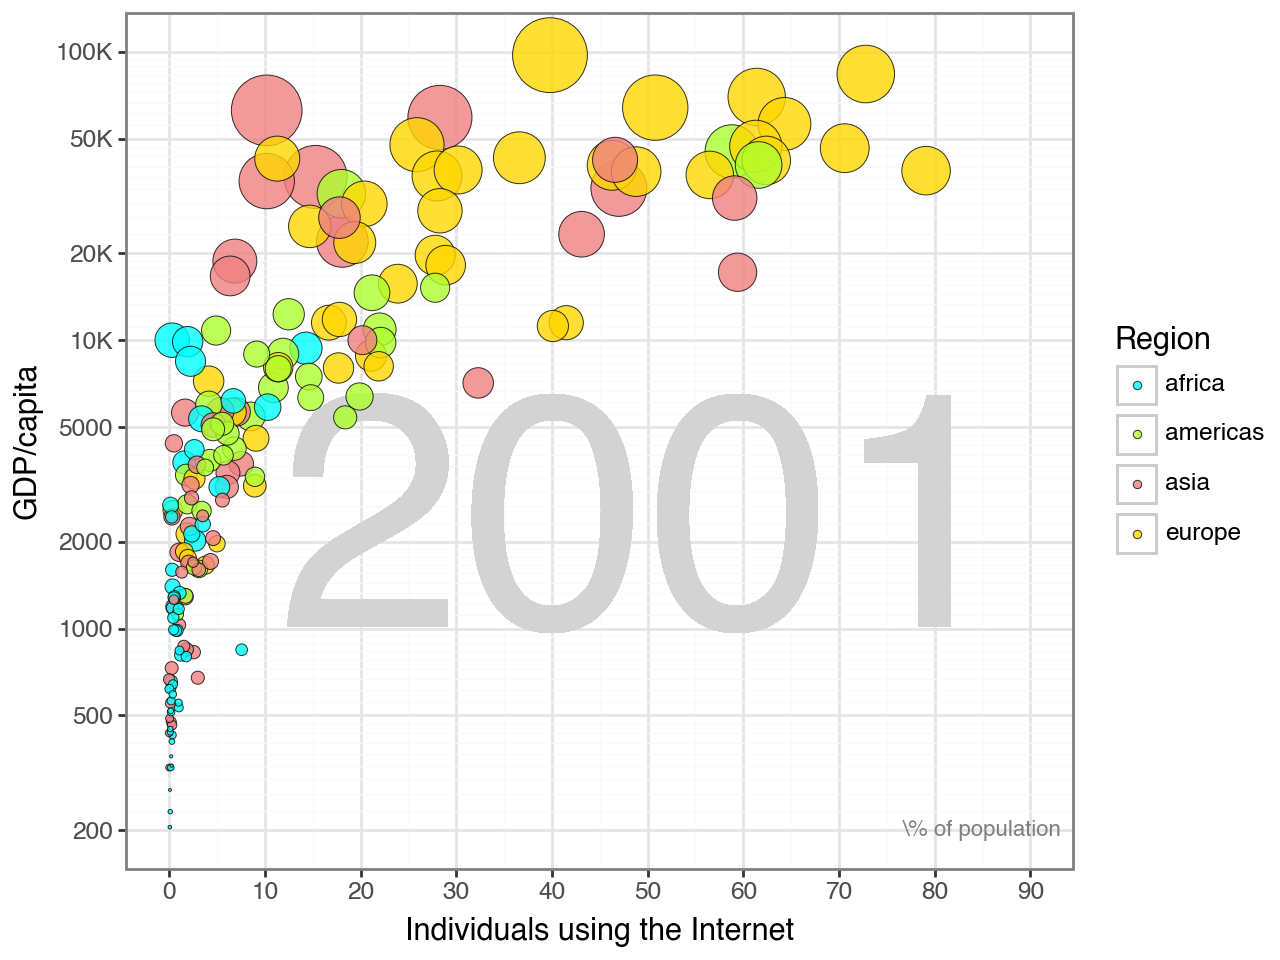

In [29]:
#replicating the plot
#cleaning the data
q3data_clean = q3data.dropna(subset=['four_regions'])
#make the smaller points on top
q3data_clean = q3data_clean.sort_values(by='income', ascending=False)
#colors to match gapminder
colors = {
    'africa': 'aqua',
    'americas': 'greenyellow',
    'asia': 'lightcoral',
    'europe': 'gold'
}

(ggplot(q3data_clean, aes(x='internet_users', y='gdp', size='income', fill='four_regions')) 
    + geom_text(aes(label='2001', x=50, y=2000), color='lightgrey', size=120, alpha=0.3)
    + annotate('text', x=85, y=200, label='\% of population', color='grey', size=8, ha='center')
    + geom_point(alpha=0.8, color='black', stroke=0.2)
    + labs(x='Individuals using the Internet', y='GDP/capita', fill='World Regions')
    + scale_size(range = [.1, 15])
    + scale_x_continuous(
        limits=(0, 90),
        breaks=list(range(0,91,10))
    )
    + scale_y_log10(
        limits=(200, 100000),
        breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
        labels=[200, 500, 1000, 2000, 5000, "10K", "20K", "50K", "100K"]
    )
    + scale_fill_manual(
        name='Region', 
        values=colors
    )
    + guides(size=False)
    + theme_bw()
)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


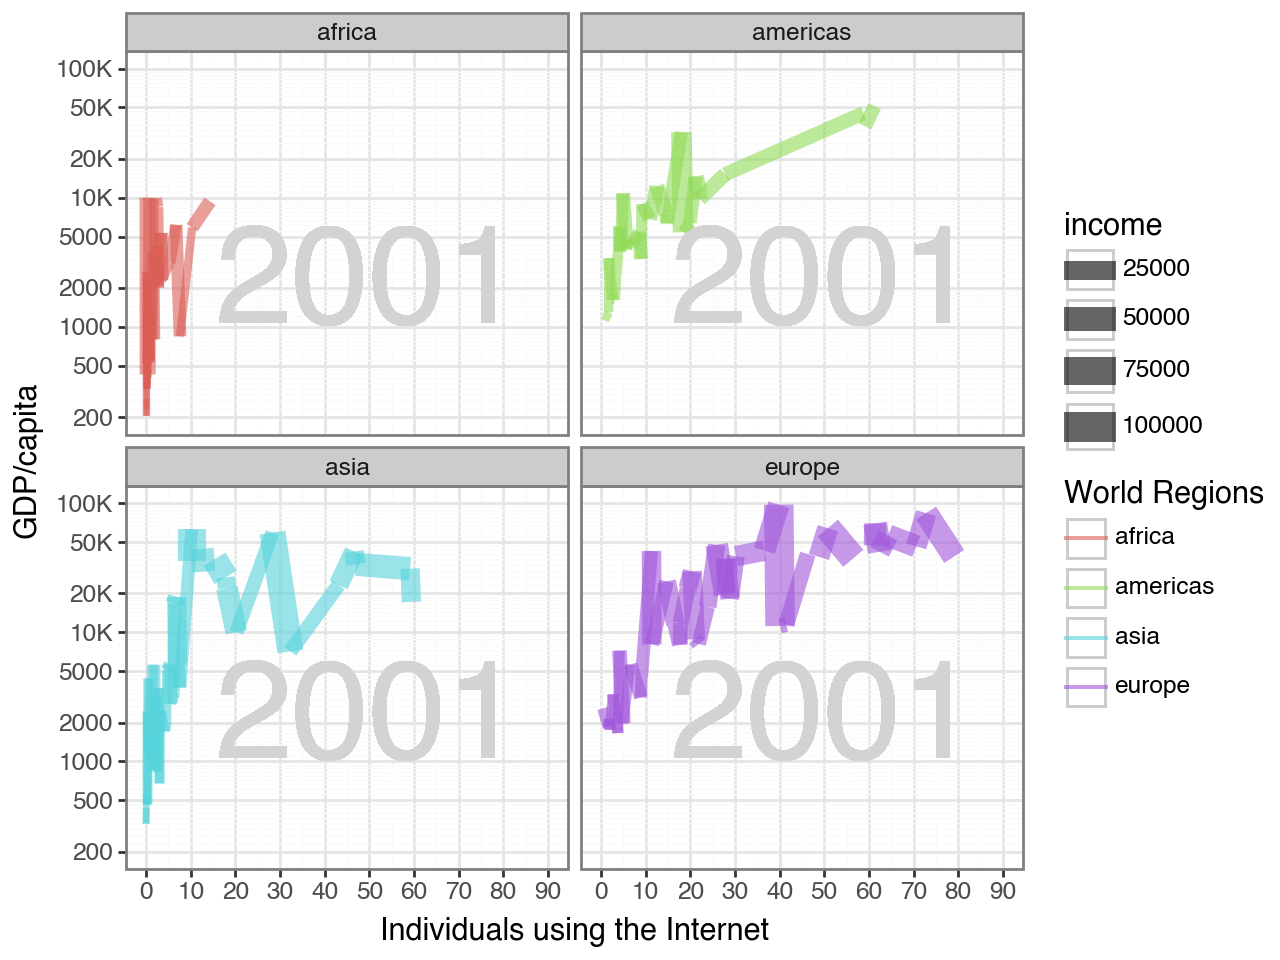

In [32]:
#alterative line plot
(ggplot(q3data_clean, aes(x='internet_users', y='gdp', color='four_regions', group='four_regions'))
     + geom_line(aes(size='income'), alpha=0.6) 
     + geom_text(aes(label='2001', x=50, y=2000), color='lightgrey', size=50, alpha=0.3)
     + labs(x='Individuals using the Internet', y='GDP/capita', color='World Regions')
     + scale_x_continuous(limits=(0, 90), breaks=list(range(0, 91, 10)))
     + scale_y_log10(limits=(200, 100000), 
                     breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
                     labels=[200, 500, 1000, 2000, 5000, "10K", "20K", "50K", "100K"])
     + scale_fill_manual(name='Region', values=colors)
     + facet_wrap('~four_regions')
     + theme_bw())

Appendix and References

References:

- https://stackoverflow.com/questions/27859890/geom-text-does-not-appear-using-scale-y-log10

- https://ggplot2.tidyverse.org/reference/annotate.html

- https://scales.arabpsychology.com/stats/how-to-adjust-line-thickness-in-ggplot2/

- https://matplotlib.org/stable/gallery/color/named_colors.html

- https://stackoverflow.com/questions/4699493/transform-only-one-axis-to-log10-scale-with-ggplot2

AI Statement:

Chat-GPT was used to suggest several analyses, specifically plausible plots that can handle four variables, including violin plots, heatmaps, and faceted line plots. It also suggested mapping one variable to line thickness using geom_line for enhanced aesthetics. Furthermore, it provided instructions on how to manually set axis spacing by adjusting tick intervals and axis limits to ensure better visualization clarity.